In [21]:
import psycopg2
import matplotlib.pyplot as plt


connection = psycopg2.connect(
    database="piscineds",
    user="pbureera",
    password="mysecretpassword",
    host="localhost",
    port="5432",
)
connection.autocommit = True
cursor = connection.cursor()


In [22]:
cursor.execute(
    """
    SELECT
        SUM(price) AS count,
        AVG(price) AS mean,
        SQRT(VARIANCE(price)) AS std,
        MIN(price) AS min,
        PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY price) AS "25%",
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price) AS "50%",
        PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY price) AS "75%",
        MAX(price) AS max
    FROM customers
    WHERE event_type = 'purchase';
    """
)
data = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
stats = [(col, val) for col, val in zip(column_names, data[0])]
print("\n".join([f"{col}\t{val}" for col, val in stats]))


count	6348004.870008595
mean	4.932377889171229
std	8.924840870550387
min	-79.37
25%	1.59
50%	3.0
75%	5.4
max	327.78


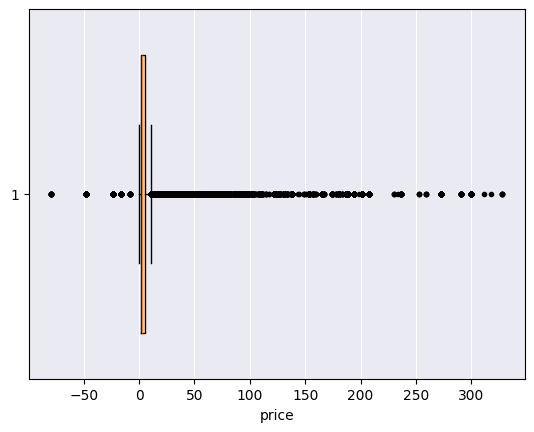

In [23]:
cursor.execute(
    """
    SELECT price FROM customers
    WHERE event_type = 'purchase'
    """
)
data = cursor.fetchall()
prices = [item[0] for item in data]
flierprops = dict(marker='o', markerfacecolor='black', markersize=3,
                  linestyle='none')
plt.boxplot(prices, vert=False, flierprops=flierprops)
plt.ylim(0.9, 1.1)
plt.xlabel("price")

plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()

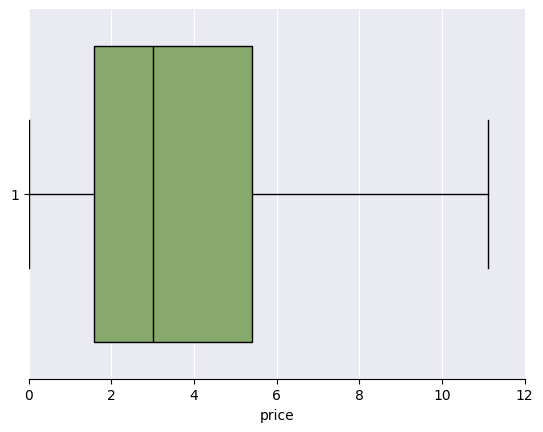

In [24]:
boxprops = dict(facecolor='#87A96B', color='black')
medianprops = dict(color='black')

fig, ax = plt.subplots()

ax.boxplot(prices,
           vert=False,
           widths=0.8,
           flierprops=flierprops,
           patch_artist=True,
           boxprops=boxprops,
           showfliers=False,
           medianprops=medianprops
           )

ax.set_xlim(0, 12)
# Hide the axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel("price")
plt.yticks()

plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()


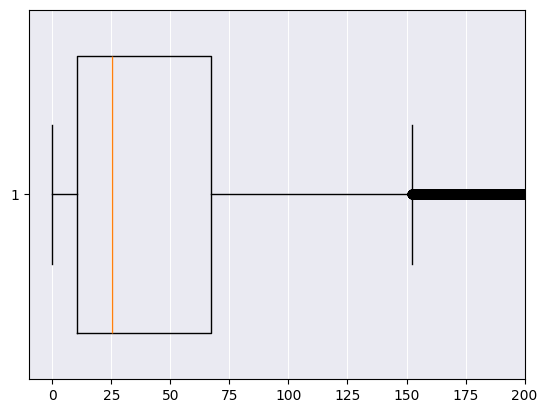

In [25]:
cursor.execute(
    """
    SELECT SUM(price) FROM customers
    WHERE event_type = 'cart' GROUP BY user_id
    """
)
data = cursor.fetchall()
prices = [item[0] for item in data]
plt.boxplot(prices, vert=False)
plt.ylim(0.9, 1.1)
plt.xlim(-10, 200)

plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()

cursor.close()
connection.close()